# Imports

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import numpy as np

### Read the dataframe

In [2]:
df_grape=pd.read_csv('../../data/GRAPE_QUALITY.csv')
df_grape.head()

,sample_id,variety,region,quality_score,quality_category,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,harvest_date,sun_exposure_hours,soil_moisture_percent,rainfall_mm
0,1,Riesling,Barossa Valley,2.11,Medium,13.70,3.17,251.81,18.58,2023-09-04,8.4,55.9,223.3
1,2,Pinot Noir,Loire Valley,2.83,High,20.84,3.15,289.00,22.08,2023-09-16,8.8,36.9,312.1
2,3,Sauvignon Blanc,Napa Valley,3.52,Premium,27.46,4.07,125.14,21.40,2023-08-25,11.1,64.9,698.7
3,4,Riesling,Napa Valley,2.28,Medium,24.64,3.15,237.46,12.31,2023-09-13,8.0,54.5,660.1
4,5,Merlot,Napa Valley,2.90,High,26.13,3.18,221.52,12.24,2023-08-11,11.2,36.3,410.4


In [3]:
df_grape.dtypes

sample_id                  int64
variety                   object
region                    object
quality_score            float64
quality_category          object
sugar_content_brix       float64
acidity_ph               float64
cluster_weight_g         float64
berry_size_mm            float64
harvest_date              object
sun_exposure_hours       float64
soil_moisture_percent    float64
rainfall_mm              float64
dtype: object

In [23]:
df_grape.set_index('sample_id', inplace=True)

In [4]:
df_grape.describe()

,sample_id,quality_score,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,sun_exposure_hours,soil_moisture_percent,rainfall_mm
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,2.49436,20.140150,3.503410,197.112470,17.411620,8.992600,49.731900,489.42300
std,288.819436,0.52896,5.843944,0.406907,85.946831,4.302279,1.736462,11.591189,170.95025
min,1.000000,1.10000,10.060000,2.800000,50.200000,10.000000,6.000000,30.100000,200.10000
25%,250.750000,2.10000,14.817500,3.167500,122.572500,13.677500,7.500000,39.600000,341.60000
50%,500.500000,2.50000,20.375000,3.500000,195.285000,17.415000,8.900000,49.400000,490.40000
75%,750.250000,2.87000,25.212500,3.860000,271.265000,21.097500,10.400000,60.300000,628.65000
max,1000.000000,3.97000,29.990000,4.200000,349.870000,24.970000,12.000000,70.000000,799.30000


### Check for missing values

In [5]:
missing_values = df_grape.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 sample_id                0
variety                  0
region                   0
quality_score            0
quality_category         0
sugar_content_brix       0
acidity_ph               0
cluster_weight_g         0
berry_size_mm            0
harvest_date             0
sun_exposure_hours       0
soil_moisture_percent    0
rainfall_mm              0
dtype: int64


In [6]:
duplicates = df_grape.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [7]:
categorical_columns = df_grape.select_dtypes(include='object').columns
for column in categorical_columns:
    unique_values = df_grape[column].unique()
    print(f"\nUnique values in '{column}': {unique_values}")


Unique values in 'variety': ['Riesling' 'Pinot Noir' 'Sauvignon Blanc' 'Merlot' 'Zinfandel'
 'Chardonnay' 'Syrah' 'Cabernet Sauvignon']

Unique values in 'region': ['Barossa Valley' 'Loire Valley' 'Napa Valley' 'Mendoza' 'Tuscany' 'Rioja'
 'Bordeaux' 'Sonoma']

Unique values in 'quality_category': ['Medium' 'High' 'Premium' 'Low']

Unique values in 'harvest_date': ['2023-09-04' '2023-09-16' '2023-08-25' '2023-09-13' '2023-08-11'
 '2023-09-29' '2023-08-01' '2023-09-24' '2023-08-16' '2023-09-01'
 '2023-09-20' '2023-09-03' '2023-08-13' '2023-09-11' '2023-09-30'
 '2023-08-14' '2023-08-18' '2023-08-21' '2023-08-02' '2023-09-19'
 '2023-08-30' '2023-08-20' '2023-08-29' '2023-09-17' '2023-09-05'
 '2023-08-08' '2023-08-06' '2023-08-28' '2023-08-10' '2023-09-10'
 '2023-09-28' '2023-09-18' '2023-09-15' '2023-08-23' '2023-09-27'
 '2023-08-15' '2023-08-09' '2023-08-19' '2023-09-22' '2023-08-24'
 '2023-08-26' '2023-08-05' '2023-09-26' '2023-08-17' '2023-09-25'
 '2023-09-21' '2023-09-09' '2023-08-03

#### Dates to datetime

In [8]:
df_grape['harvest_date'] = pd.to_datetime(df_grape['harvest_date'])

### Unique years

In [9]:
unique_years = df_grape['harvest_date'].dt.year.value_counts()
print("Year counts:\n", unique_years)

Year counts:
 harvest_date
2023    1000
Name: count, dtype: int64


### Datetime to days of the year + Month category

In [11]:
df_grape['day_of_year'] = df_grape['harvest_date'].dt.dayofyear

df_grape['month'] = df_grape['harvest_date'].dt.month

df_grape = df_grape.drop(columns=['harvest_date'])
df_grape.head()

,sample_id,variety,region,quality_score,quality_category,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,sun_exposure_hours,soil_moisture_percent,rainfall_mm,day_of_year,month
0,1,Riesling,Barossa Valley,2.11,Medium,13.70,3.17,251.81,18.58,8.4,55.9,223.3,247,9
1,2,Pinot Noir,Loire Valley,2.83,High,20.84,3.15,289.00,22.08,8.8,36.9,312.1,259,9
2,3,Sauvignon Blanc,Napa Valley,3.52,Premium,27.46,4.07,125.14,21.40,11.1,64.9,698.7,237,8
3,4,Riesling,Napa Valley,2.28,Medium,24.64,3.15,237.46,12.31,8.0,54.5,660.1,256,9
4,5,Merlot,Napa Valley,2.90,High,26.13,3.18,221.52,12.24,11.2,36.3,410.4,223,8


## Analysis of quality category

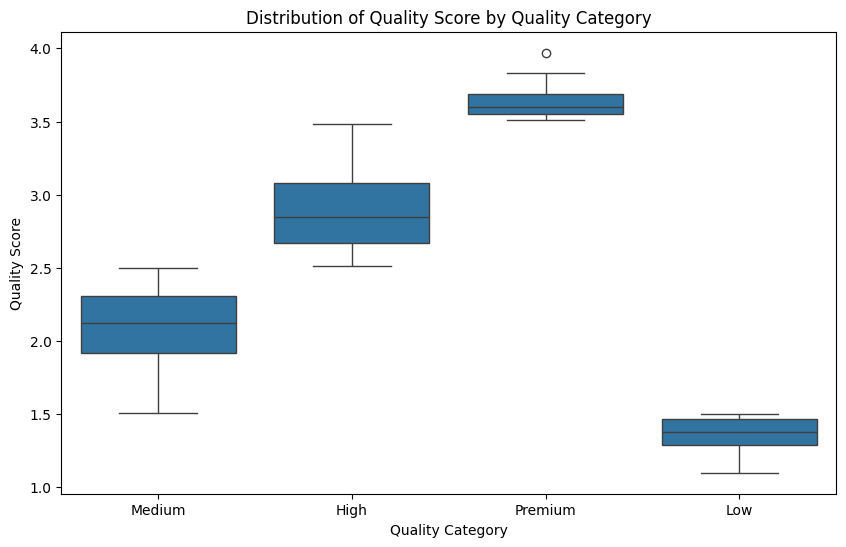

In [12]:
quality_summary = df_grape.groupby('quality_category')['quality_score'].describe()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_grape, x='quality_category', y='quality_score')
plt.title('Distribution of Quality Score by Quality Category')
plt.xlabel('Quality Category')
plt.ylabel('Quality Score')
plt.show()

In [13]:
quality_summary

,count,mean,std,min,25%,50%,75%,max
quality_category,,,,,,,,
High,468.0,2.888910,0.252297,2.51,2.6700,2.850,3.0825,3.48
Low,26.0,1.362692,0.115847,1.10,1.2925,1.375,1.4675,1.50
Medium,477.0,2.100147,0.258216,1.51,1.9200,2.120,2.3100,2.50
Premium,29.0,3.625862,0.105679,3.51,3.5500,3.600,3.6900,3.97


Score Ranges:

    Low: 1.10 to 1.50
    Medium: 1.51 to 2.50
    High: 2.51 to 3.48
    Premium: 3.51 to 4.00 (max here is 3.97)

### Addressing Class balance issue

#### Explanation here

#### Step 1: Define score ranges (clusters) based on quality_score

In [24]:
grape_resample=df_grape
grape_resample

,variety,region,quality_score,quality_category,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,sun_exposure_hours,soil_moisture_percent,rainfall_mm,day_of_year,month
sample_id,,,,,,,,,,,,,
1,Riesling,Barossa Valley,2.11,Medium,13.70,3.17,251.81,18.58,8.4,55.9,223.3,247,9
2,Pinot Noir,Loire Valley,2.83,High,20.84,3.15,289.00,22.08,8.8,36.9,312.1,259,9
3,Sauvignon Blanc,Napa Valley,3.52,Premium,27.46,4.07,125.14,21.40,11.1,64.9,698.7,237,8
4,Riesling,Napa Valley,2.28,Medium,24.64,3.15,237.46,12.31,8.0,54.5,660.1,256,9
5,Merlot,Napa Valley,2.90,High,26.13,3.18,221.52,12.24,11.2,36.3,410.4,223,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Sauvignon Blanc,Napa Valley,3.14,High,23.14,4.01,182.63,23.46,10.1,53.2,363.9,252,9
997,Cabernet Sauvignon,Sonoma,2.65,High,29.13,3.02,150.32,11.79,9.0,56.7,325.7,231,8
998,Pinot Noir,Napa Valley,2.11,Medium,11.38,3.23,168.37,14.92,10.6,66.5,473.2,240,8


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['variety', 'region']:
    label_encoders[column] = LabelEncoder()
    grape_resample[column] = label_encoders[column].fit_transform(grape_resample[column])

In [27]:
def generate_synthetic_samples(cluster_data, n_samples=100):
    n_neighbors = min(5, len(cluster_data))
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    neigh.fit(cluster_data)

    synthetic_samples = []
    for _ in range(n_samples):
        idx = np.random.choice(range(len(cluster_data)))
        sample = cluster_data[idx]
        
        neighbors = neigh.kneighbors([sample], return_distance=False)[0]
        neighbor_sample = cluster_data[np.random.choice(neighbors)]
        
        alpha = np.random.rand()
        synthetic_sample = sample + alpha * (neighbor_sample - sample)
        
        synthetic_samples.append(synthetic_sample)
    
    return np.array(synthetic_samples)

In [29]:
synthetic_data = []
for label in ['Low', 'Premium']:
    cluster_data = grape_resample[grape_resample['quality_category'] == label].drop(columns=['quality_category']).values
    #We drop the label column because not encoded : we will recreate it later
    if len(cluster_data) > 1:
        synthetic_samples = generate_synthetic_samples(cluster_data, n_samples=100)
        synthetic_data.append(synthetic_samples)

In [41]:
synthetic_data_combined = np.vstack(synthetic_data)

numeric_columns = grape_resample.drop(columns=['quality_category']).columns
print(numeric_columns)

synthetic_df = pd.DataFrame(synthetic_data_combined, columns=numeric_columns)
synthetic_df.head()

Index(['variety', 'region', 'quality_score', 'sugar_content_brix',
       'acidity_ph', 'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours',
       'soil_moisture_percent', 'rainfall_mm', 'day_of_year', 'month'],
      dtype='object')


,variety,region,quality_score,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,sun_exposure_hours,soil_moisture_percent,rainfall_mm,day_of_year,month
0,3.160496,1.839504,1.409630,11.187775,3.514939,293.551196,13.238276,7.158025,37.824676,310.975434,226.222232,8.000000
1,6.781795,0.872820,1.364364,12.892505,3.884538,154.577915,11.237669,7.234538,54.349128,460.520204,216.872820,8.000000
2,3.404414,1.000000,1.430221,12.679108,3.767868,291.926641,12.367436,7.080883,42.205843,286.287045,233.573515,8.000000
3,1.000000,4.201622,1.299291,14.241550,3.617741,138.917889,10.803080,6.448227,44.287838,234.954918,239.228973,8.359676
4,3.000000,6.000000,1.500000,14.000000,2.810000,69.970000,14.440000,6.800000,65.300000,787.000000,217.000000,8.000000


### Add the labels back

In [42]:
bins = [1.0, 1.5, 2.5, 3.5, 4.0]
labels = ['Low', 'Medium', 'High', 'Premium']

In [44]:
synthetic_df['quality_category'] = pd.cut(synthetic_df['quality_score'], bins=bins, labels=labels, include_lowest=True)

balanced_grape_data = pd.concat([grape_resample, synthetic_df], ignore_index=True)

balanced_grape_data.head()

,variety,region,quality_score,quality_category,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,sun_exposure_hours,soil_moisture_percent,rainfall_mm,day_of_year,month
0,4.0,0.0,2.11,Medium,13.70,3.17,251.81,18.58,8.4,55.9,223.3,247.0,9.0
1,3.0,2.0,2.83,High,20.84,3.15,289.00,22.08,8.8,36.9,312.1,259.0,9.0
2,5.0,4.0,3.52,Premium,27.46,4.07,125.14,21.40,11.1,64.9,698.7,237.0,8.0
3,4.0,4.0,2.28,Medium,24.64,3.15,237.46,12.31,8.0,54.5,660.1,256.0,9.0
4,2.0,4.0,2.90,High,26.13,3.18,221.52,12.24,11.2,36.3,410.4,223.0,8.0
